In [ ]:
# Objective : To predict the quality of the wine based on the given features such as fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from IPython.display import Image  
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv(r"winequality-white.csv",sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
# from the above obervations,it is clear that quality is the target column ,which comparises of score between 0 and 10

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [36]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [37]:
df.shape#this indicates 4898 rows and 12 columns

(4898, 12)

In [39]:
df.isnull().sum()# to check whether there is missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

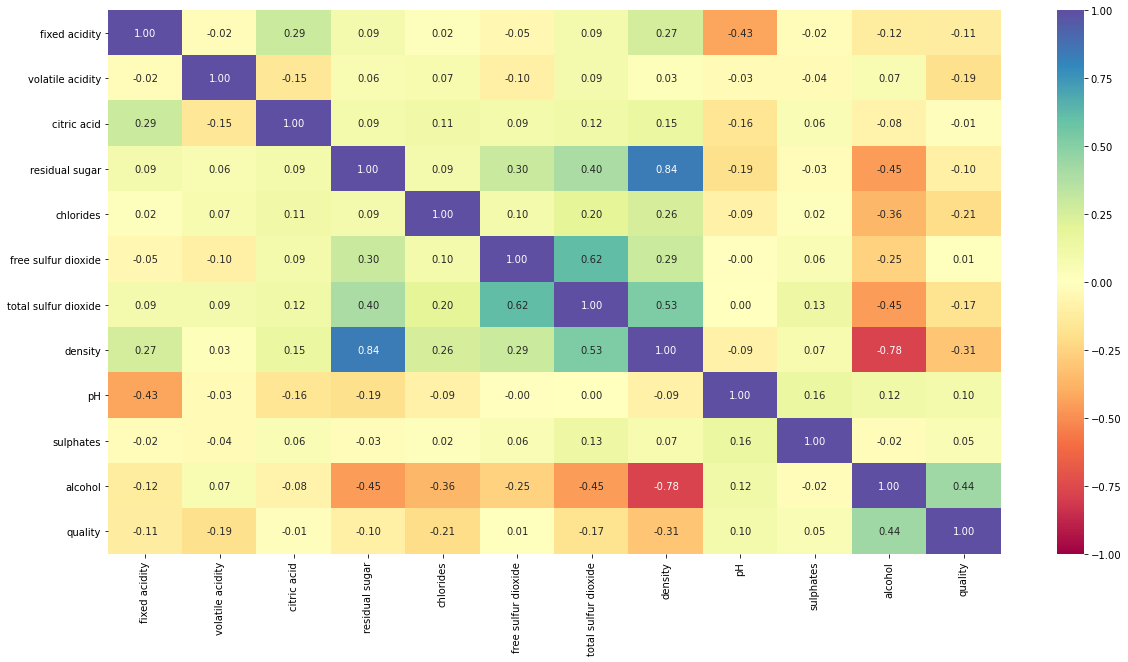

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

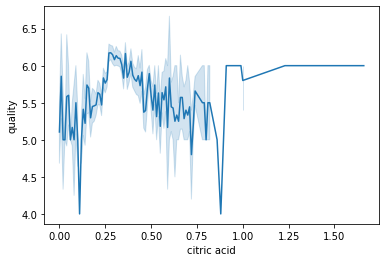

In [41]:
sns.lineplot(x="citric acid", y="quality", data=df) 

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

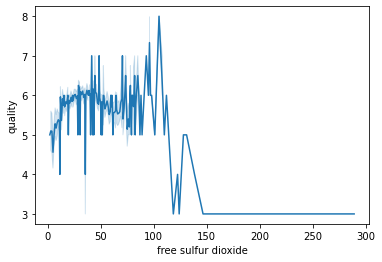

In [42]:
sns.lineplot(x="free sulfur dioxide", y="quality", data=df) 

<AxesSubplot:xlabel='pH', ylabel='quality'>

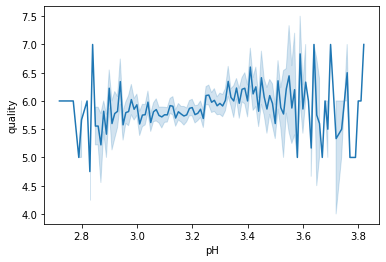

In [43]:
sns.lineplot(x="pH", y="quality", data=df) 

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

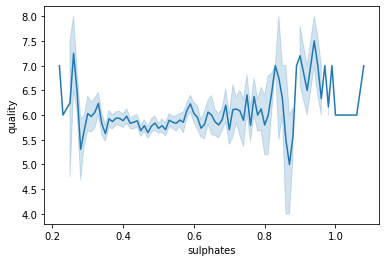

In [44]:
sns.lineplot(x="sulphates", y="quality", data=df) 

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

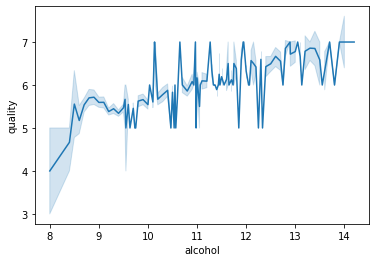

In [45]:
sns.lineplot(x="alcohol", y="quality", data=df) 

In [46]:
# from the above graphs ,it is clear that features such as alcohol,sulphates,pH and citric acid is having high score for quality than others

In [59]:
X = df. iloc[:, [2,8,9,10]]
y = df['quality']
# here I have taken selective columns based on the observations

In [60]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [126]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 100)

In [127]:

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [128]:
clf.score(x_train,y_train)

0.9979581419091373

In [129]:
py_pred = clf.predict(x_test)

In [130]:
clf.score(x_test,y_test)

0.5979591836734693

In [131]:
#hyperparameter tuning using grid search

In [132]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(6,32,10),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [133]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [134]:
grid_search.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 32, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [135]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [136]:
grid_search.best_score_

0.5564055698907915

In [137]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [138]:
clf.score(x_test,y_test)

0.6193877551020408

In [ ]:
# after hyperparameter tuning we can see that accuracy improved from 59.7 to 61.9